In [2]:
import sys
import os
import glob
import importlib
from scipy.optimize import fmin
import scipy
import random
#

import numpy as np
import pylab as plt
import matplotlib
import math as m
from matplotlib import rc
from scipy import signal, fft
import sys
from scipy.optimize import curve_fit
from scipy.optimize import minimize
sys.path.append('C:\\Users\\bookw\\Documents\\Research')
from supportFile import findFFT,plotThingsEO,findFilename,geterr
# from globalVars import primes,IX,primesE,primesO,IXE,IXO,freq,tempfreq,TEMPFREQ,s,M
# from brokenaxes import brokenaxes
import seaborn as sns
sns.set_palette("deep")
import pandas as pd
from scipy.stats import wilcoxon, ttest_rel, friedmanchisquare, shapiro
import pickle as pickle

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


takeAvgBA = True

    
help = """
usage:
  analysis subject protocol [formats]

add filename formats to save files in those formats:
  visualization subject protocol png,mp4
"""
# importing protocol (su17v3)
sys.path.append('"C:\\Users\\bookw\\Documents\\Research\\EMG data')
# import su18CP as proto

## analyze for HCPS_021-HCPS_028

In [ ]:
# the FreqEMG / FreqManual have the freq domains
# DISTS, REFS, etc -- fft(data)
# need a way to store the data from each participant at each of the stimulated freqs
# NOTE: this is just for manual (repeat for EMG, but keep separate)
# create array, 10x8
# then take average across participants
# then build fxn to minimize
# take fmin

Minimizing: FD_error -- EMG error + manual error
x0: 

In [29]:
M = lambda s : 1/(s**2 + s)
w_all = np.fft.fftfreq(N, 1./ fs)

# [k_v,t_v,k,t_d]
def myfit(w_all,x0,x1,x2,x3):
    num =  M(1.j*2*np.pi*w_all) * x2 / (1.j*2*np.pi*w_all) * x0 * np.exp(-1.j*2*np.pi*w_all*x1)
    denom = 1 + M(1.j*2*np.pi*w_all) * x2 / (1.j*2*np.pi*w_all) * np.exp(-1.j*2*np.pi*w_all*x3)
    return num / denom

estimate = [0.38,0.190,2.5,0,0.40,0.145,2.5,0]
N = 2400; fs = 60

In [17]:
def angle_correction(array):
    basket = np.zeros(array.shape,dtype='complex')
    x,y = array.shape
    for i in range(x):
        for j in range(y):
            basket[i][j] = np.exp(1.j*array[i][j])
    theta_bar = np.angle(np.average(basket,axis=0))
    for i in range(x):
        for j in range(y):
            basket[i][j] = np.mod(np.angle(basket[i][j]) - theta_bar[j] - np.pi, 2*np.pi) + theta_bar[j] - np.pi
    return basket

In [73]:
# MAN == CONTROL

# [k_v,t_v,k,t_d] x 2
def COSTa(EMGavg,MANavg,est): # the OG
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],est[3])
    MANfit = myfit(w_all[freqs],est[4],est[5],est[6],est[7])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# the ks are equal
def COSTb(EMGavg,MANavg,est): 
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[5],est[2])
    MANfit = myfit(w_all[freqs],est[3],est[4],est[5],est[6])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# ks are equal and EMG feedback delay = man visual delay
def COSTc(EMGavg,MANavg,est):
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],est[1])
    MANfit = myfit(w_all[freqs],est[0],est[3],est[4],est[5])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
def COSTd(EMGavg,MANavg,est):
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],est[3])
    MANfit = myfit(w_all[freqs],est[0],est[4],est[5],est[4])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
def COSTe(EMGavg,MANavg,est):
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],est[1])
    MANfit = myfit(w_all[freqs],est[0],est[3],est[4],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
def COSTf(EMGavg,MANavg,est):
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],0)
    MANfit = myfit(w_all[freqs],est[0],est[3],est[4],est[3])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost) 

# [k_v,t_v,k,t_d]
def COSTg(EMGavg,MANavg,est):
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],est[1])
    MANfit = myfit(w_all[freqs],est[0],est[1],est[2],est[3])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)     

# [k_v,t_v,k,t_d]
def COSTh(EMGavg,MANavg,est):
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],est[3])
    MANfit = myfit(w_all[freqs],est[0],est[1],est[2],est[1])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
def COSTi(EMGavg,MANavg,est):
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],est[1])
    MANfit = myfit(w_all[freqs],est[0],est[3],est[2],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
def COSTj(EMGavg,MANavg,est):
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],0)
    MANfit = myfit(w_all[freqs],est[0],est[3],est[2],est[3])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
def COSTk(EMGavg,MANavg,est):
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],0)
    MANfit = myfit(w_all[freqs],est[0],est[3],est[2],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
def COSTl(EMGavg,MANavg,est):
    EMGfit = myfit(w_all[freqs],est[0],est[1],est[2],est[1])
    MANfit = myfit(w_all[freqs],est[0],est[1],est[2],est[1])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)


In [76]:
# estimate the best fit
def chain(leave_out,reps,EMG_data,man_data,num_vars):
    holder = {}
    EMG = {}
    man = {}
    Keys = []
    
    # collect the info we want (all except excluded participant)
    for key in keys:
        if (leave_out != key):
            EMG[key] = EMG_data[key]
            man[key] = man_data[key]
            Keys.append(key)
    
    # take the mean
    mEMG = np.zeros(8,dtype='complex')
    mman = np.zeros(8,dtype='complex')
    ang_EMG = np.zeros(8,dtype='complex')
    ang_man = np.zeros(8,dtype='complex')
    for j in range(8):
        mEMG[j] = np.mean([abs(EMG[Keys[i]][j]) for i in range(10)])
        mman[j] = np.mean([abs(man[Keys[i]][j]) for i in range(10)])
        fj = np.array([[EMG[Keys[i]][j] for i in range(10)]])
        ang_EMG[j] = np.mean(angle_correction(fj))
        fj = np.array([[man[Keys[i]][j] for i in range(10)]])
        ang_man[j] = np.mean(angle_correction(fj))
    
    mEMG = mEMG*np.exp(1.j*ang_EMG)
    mman = mman*np.exp(1.j*ang_man)
        
    # run minimize the desired number of times
    # save [FDerror, calculated values] as [key, value]
    for idx in range(reps):
        # [k_v,t_v,k,t_d]
        if num_vars == 'a':
            estimate = np.random.rand(1,8)
            xopt = minimize(lambda x: COSTa(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'b':
            estimate = np.random.rand(1,7)
            xopt = minimize(lambda x: COSTb(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'c':
            estimate = np.random.rand(1,6)
            xopt = minimize(lambda x: COSTc(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'd':
            estimate = np.random.rand(1,6)
            xopt = minimize(lambda x: COSTd(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'e':
            estimate = np.random.rand(1,5)
            xopt = minimize(lambda x: COSTe(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'f':
            estimate = np.random.rand(1,5)
            xopt = minimize(lambda x: COSTf(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'g':
            estimate = np.random.rand(1,4)
            xopt = minimize(lambda x: COSTg(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'h':
            estimate = np.random.rand(1,4)
            xopt = minimize(lambda x: COSTh(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'i':
            estimate = np.random.rand(1,4)
            xopt = minimize(lambda x: COSTi(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'j':
            estimate = np.random.rand(1,4)
            xopt = minimize(lambda x: COSTj(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'k':
            estimate = np.random.rand(1,4)
            xopt = minimize(lambda x: COSTk(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None)))
        if num_vars == 'l':
            estimate = np.random.rand(1,3)
            xopt = minimize(lambda x: COSTl(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None)))
        
        
        holder[xopt.fun] = xopt.x
    
    # find the min FDerror
    best = min(holder.keys())
    
    # return the corresponding calculated values
    return holder[best],best


# determine the accuracy of the estimates
# note: leave_out has to be array
#       best_outputs has to be array
def loo(leave_out,best_outputs,num_vars):
    
    # compute model for left-out data
    if (num_vars == 'a'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[3])
        man_fit = myfit(w_all,best_outputs[4],best_outputs[5],best_outputs[6],best_outputs[7])
    if (num_vars == 'b'): 
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[3])
        man_fit = myfit(w_all,best_outputs[0],best_outputs[4],best_outputs[5],best_outputs[6])
    if (num_vars == 'c'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[1])
        man_fit = myfit(w_all,best_outputs[0],best_outputs[3],best_outputs[4],best_outputs[5])
    if (num_vars == 'd'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[3])
        man_fit = myfit(w_all,best_outputs[0],best_outputs[4],best_outputs[5],best_outputs[4])
    if (num_vars == 'e'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[1])
        man_fit = myfit(w_all,best_outputs[0],best_outputs[3],best_outputs[4],0)
    if (num_vars == 'f'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],0)
        man_fit = myfit(w_all,best_outputs[0],best_outputs[3],best_outputs[4],best_outputs[3])
    if (num_vars == 'g'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[1])
        man_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[3])
    if (num_vars == 'h'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[3])
        man_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[1])
    if (num_vars == 'i'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[1])
        man_fit = myfit(w_all,best_outputs[0],best_outputs[3],best_outputs[2],0)
    if (num_vars == 'j'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],0)
        man_fit = myfit(w_all,best_outputs[0],best_outputs[3],best_outputs[2],best_outputs[3])
    if (num_vars == 'k'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],0)
        man_fit = myfit(w_all,best_outputs[0],best_outputs[3],best_outputs[2],0)
    if (num_vars == 'l'):
        EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[1])
        man_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[1])
            
    # calculate the error and return
    # actual data, not model
    lEMG = leave_out[:8]
    lman = leave_out[8:]
    
    cost = np.linalg.norm(lEMG-EMG_fit[freqs]) + np.linalg.norm(lman-man_fit[freqs])
    
    return cost

In [15]:
# a function to run everything above
def runAll(EMG_data,manual_data,num_vars,reps):
    best_outputs = {}
    best_min = []
    comp = []
    
    # calculate best model
    for key in EMG_data.keys():
        best_outputs[key] = []
        output,best = chain(key,reps,EMG_data,manual_data,num_vars)
        best_outputs[key] = output
        best_min.append(best)
        
        # loo analysis
        left_out = np.append(EMG_data[key],manual_data[key])
        rest = best_outputs[key]
        cost = loo(left_out,rest,num_vars)
        comp.append(cost)
        
    return np.mean(cost),best_outputs


# a function to get the data we want
def dataSelect(EMG_data,manual_data):
    basket_EMG = {}
    basket_man = {}
    
    
    # EMG data
    for key in EMG_data.keys():
        basket_EMG[key] = np.zeros(8,dtype=complex)
        temp1 = np.zeros((15,8),dtype=complex)
        flag = 0
        for i,trial in EMG_data[key].items():
            if (flag < 30):
                OUTS = trial['OUTS']
                REFS = trial['REFS']
                if (flag%2 != 0):
                    for j in range(4):
                        temp1[flag//2][2*j] = OUTS[even[j]] / REFS[even[j]]
                else:
                    for j in range(4):
                        temp1[flag//2][2*j+1] = OUTS[odd[j]] / REFS[odd[j]]
                flag += 1

        # take the mean (by magnitude & angle)
        temp1 = temp1[11:14,:]
        means = np.mean(abs(temp1),axis=0)
        angles = np.mean(angle_correction(temp1),axis=0)

        # then combine into single value
        comb = means*np.exp(1j*angles)

        # finally, output as one array
        basket_EMG[key] = comb
        
    # manual data
    for key in manual_data.keys():
        basket_man[key] = np.zeros(8,dtype=complex)
        temp1 = np.zeros((15,8),dtype=complex)
        flag = 0
        for i,trial in manual_data[key].items():
            if (flag < 30):
                OUTS = trial['OUTS']
                REFS = trial['REFS']
                if (flag%2 != 0):
                    for j in range(4):
                        temp1[flag//2][2*j] = OUTS[even[j]] / REFS[even[j]]
                else:
                    for j in range(4):
                        temp1[flag//2][2*j+1] = OUTS[odd[j]] / REFS[odd[j]]
                flag += 1

        # take last 3 rows of temp1
        temp1 = temp1[11:14,:]
        means = np.mean(abs(temp1),axis=0)
        angles = np.mean(angle_correction(temp1),axis=0)
        
        comb = means*np.exp(1j*angles)
            
        basket_man[key] = comb
        
    return basket_EMG,basket_man

In [77]:
# a function for bootstrapping
def bootstrap(best_outputs,num_vars):
    
    # separate the data
    et_d = []
    mt_d = []

    for k in best_outputs.keys():
        if num_vars == 'a':
            et_d.append(best_outputs[k][3])
            mt_d.append(best_outputs[k][7]) 
        if num_vars == 'b':
            et_d.append(best_outputs[k][3])
            mt_d.append(best_outputs[k][6])
        if num_vars == 'c':
            et_d.append(best_outputs[k][1])
            mt_d.append(best_outputs[k][5])
        if num_vars == 'd':
            et_d.append(best_outputs[k][3])
            mt_d.append(best_outputs[k][4])
        if num_vars == 'e':
            et_d.append(best_outputs[k][1])
            mt_d.append([0])
        if num_vars == 'f':
            mt_d.append(best_outputs[k][3])
            et_d.append([0])
        if num_vars == 'g':
            et_d.append(best_outputs[k][1])
            mt_d.append(best_outputs[k][3])
        if num_vars == 'h':
            et_d.append(best_outputs[k][3])
            mt_d.append(best_outputs[k][1])
        if num_vars == 'i':
            et_d.append(best_outputs[k][1])
            mt_d.append([0])
        if num_vars == 'j':
            et_d.append([0])
            mt_d.append(best_outputs[k][3])
        if num_vars == 'k':
            et_d.append([0])
            mt_d.append([0])
        if num_vars == 'l':
            et_d.append(best_outputs[k][1])
            mt_d.append(best_outputs[k][1])

           
    # then run bootstrap analysis
    blank_emg = []
    blank_man = []
    for n in range(1000):
        blank_emg.append(np.mean(random.choices(et_d,k=len(et_d))))
        blank_man.append(np.mean(random.choices(mt_d,k=len(mt_d))))
        
    erange = scipy.stats.norm.interval(alpha=0.95, loc=np.mean(blank_emg), scale=scipy.stats.sem(blank_emg))
    mrange = scipy.stats.norm.interval(alpha=0.95, loc=np.mean(blank_man), scale=scipy.stats.sem(blank_man))
        

    return erange,mrange

In [41]:
def other_bootstrap(best_outputs):
        
    # separate the data
    ek_v = []
    et_v = []
    ek = []
    et_d = []
    mk_v = []
    mt_v = []
    mk = []
    mt_d = []
    
    var_list = [ek_v,mk_v,et_v,mt_v,ek,mk,et_d,mt_d]
    e_ints = []
    m_ints = []
    
    
    # currently formatted for 4 free vars, model F
    for k in best_outputs.keys():
        ek_v.append(best_outputs[k][0])
        et_v.append(best_outputs[k][1])
        ek.append(best_outputs[k][2])
        et_d.append(best_outputs[k][1])
        mk_v.append(best_outputs[k][0])
        mt_v.append(best_outputs[k][1])
        mk.append(best_outputs[k][2])
        mt_d.append(best_outputs[k][3])
        
    for idx in [0,2,4,6]:
                
        # bootstrap
        blank_emg = []
        blank_man = []
        for n in range(1000):
            blank_emg.append(np.mean(random.choices(var_list[idx],k=len(var_list[idx]))))
            blank_man.append(np.mean(random.choices(var_list[idx+1],k=len(var_list[idx+1]))))

        erange = scipy.stats.norm.interval(alpha=0.95, loc=np.mean(blank_emg), scale=scipy.stats.sem(blank_emg))
        mrange = scipy.stats.norm.interval(alpha=0.95, loc=np.mean(blank_man), scale=scipy.stats.sem(blank_man))
        
        e_ints.append(erange)
        m_ints.append(mrange)
        
    return e_ints,m_ints

In [58]:
os.chdir('C:\\Users\\bookw\\Documents\\Github\\EMGdelay-analysis')

f = open("LNP_EMG_data.pickle","rb")
emg_fo,man_fo,emg_so,man_so = pickle.load(f,encoding='latin1')
f.close()

keys = ['HCPS_021','HCPS_023','HCPS_024','HCPS_025','HCPS_026','HCPS_027','HCPS_028','HCPS_029','HCPS_030','HCPS_031','HCPS_032']

w = np.arange(0,1200)/40
freqs = [4,6,10,14,22,26,34,38]
even = freqs[::2]
odd = freqs[1::2]

In [71]:
avs = []
vals = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
bo_fo_all = {}

for v in vals:
    print(v)
    bo_fo_all[v] = []
    m,bo = runAll(emg_fo,man_fo,v,100)
    avs.append(m)
    bo_fo_all[v] = bo

index_min = np.argmin(avs)
bo_fo = bo_fo_all[vals[index_min]]

4.5


C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in remainder
  # Remove the CWD from sys.path while we load stuff.
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encou

6
7
8
0


In [72]:
avs

[4.907806731892478,
 4.956985127350257,
 4.5844383367322905,
 4.8755309811163965,
 4.7600908435633205]

In [70]:
avs

[5.054014634331719,
 4.488783320676719,
 4.938587984880179,
 4.683177296521901,
 4.830246156525039,
 4.424511301135039]

C:\Users\bookw\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1920: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
C:\Users\bookw\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1921: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


(0.4871627865943109, 0.4989352659292118) (nan, nan) 5


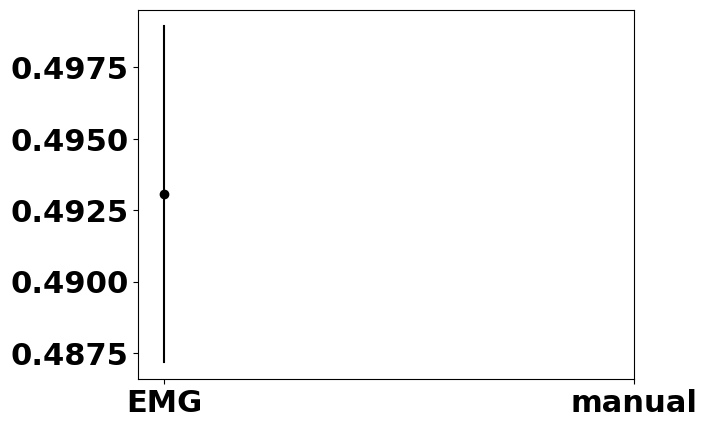

In [62]:
eint_fo,mint_fo = bootstrap(bo_fo,vals[index_min])
print(eint_fo,mint_fo,vals[index_min])

plt.figure()
plt.plot([1, 1], [eint_fo[0],eint_fo[1]], color='k')
plt.plot(1, np.mean(eint_fo),'o',color='k')
plt.plot([2, 2], [mint_fo[0],mint_fo[1]], color='b')
plt.plot(2, np.mean(mint_fo),'o',color='b')
plt.xticks([1, 2], ['EMG', 'manual'])
plt.show();

In [42]:
e_ints1,m_ints1 = other_bootstrap(bo_fo)

print("visual gain",e_ints1[0],m_ints1[0])
print("visual delay",e_ints1[1],m_ints1[1])
print("feedback gain",e_ints1[2],m_ints1[2])
print("feedback delay",e_ints1[3],m_ints1[3])

visual gain (0.5407429488695931, 0.5516471286140362) (0.540904387734288, 0.5515273517512674)
visual delay (0.5462915221120048, 0.555093819007703) (0.5482779448736202, 0.5572460597207335)
feedback gain (3.0144898835885474, 3.3130009430559904) (2.943113672569306, 3.2352779048133224)
feedback delay (0.5477862233584064, 0.5563467990264722) (0.572114330593369, 0.5852065890932115)


In [43]:
# get mean & standard dev for the confidence intervals

for i in range(4):
    m,std = np.mean(e_ints1[i]),(e_ints1[i][1]-e_ints1[i][0])/3.92*np.sqrt(11)
    print(m,std)

0.5461950387418146 0.009225783892579413
0.5506926705598539 0.007447427575597223
3.163745413322269 0.2525635663329021
0.5520665111924393 0.007242912622556179


In [44]:
ps = np.zeros(4)
ts = np.zeros(4)
for i in range(4):
    a,b = scipy.stats.ttest_ind_from_stats(np.mean(e_ints1[i]),(e_ints1[i][1]-e_ints1[i][0])/3.92*np.sqrt(11),11,
                                           np.mean(m_ints1[i]),(m_ints1[i][1]-m_ints1[i][0])/3.92*np.sqrt(11),11)
    ps[i] = b
    ts[i] = a

In [45]:
ps

array([9.95773322e-01, 5.25922759e-01, 4.92212204e-01, 1.73265464e-06])

In [10]:
avs2 = []
bo_so_all = {}

for v in vals:
    bo_so_all[v] = []
    m,bo = runAll(emg_so,man_so,v,1000)
    avs2.append(m)
    bo_so_all[v] = bo
    
idx_so = min(range(len(avs2)), key=avs2.__getitem__)
bo_so = bo_so_all[idx_so]

C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


(0.4273045193711543, 0.4374841842127003) (0.5771303653920961, 0.5894248826152919) 4.5


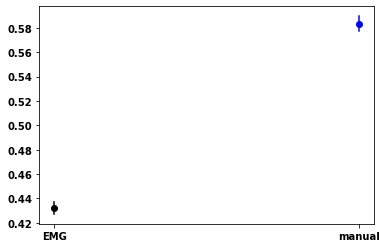

In [16]:
eint_so,mint_so = bootstrap(bo_so)
print(eint_so,mint_so,idx_so)


plt.figure()
plt.plot([1, 1], [eint_so[0],eint_so[1]], color='k')
plt.plot(1, np.mean(eint_so),'o',color='k')
plt.plot([2, 2], [mint_so[0],mint_so[1]], color='b')
plt.plot(2, np.mean(mint_so),'o',color='b')
plt.xticks([1, 2], ['EMG', 'manual']);

In [11]:
e_ints,m_ints = other_bootstrap(bo_so)

print("visual gain",e_ints[0],m_ints[0])
print("visual delay",e_ints[1],m_ints[1])
print("gain",e_ints[2],m_ints[2])
print("feedback delay",e_ints[3],m_ints[3])

3 4.092639696342461
4 5.186379007358922
4.5 3.6619108579573263
5 5.7445510082900135
5.5 5.720073143347987
6 5.6405507486612105
7 5.745511457263536
8 4.179757779605764
0 6.245599090524609


In [44]:
eint_so[1]

21.302144133168976

# graphing

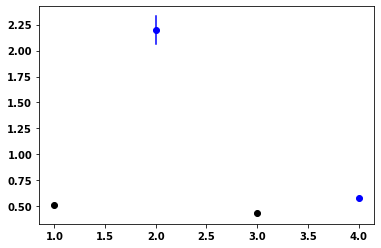

In [18]:
plt.figure()
plt.plot([1, 1], [eint_fo[0],eint_fo[1]], color='k')
plt.plot(1, np.mean(eint_fo),'o',color='k')
plt.plot([2, 2], [mint_fo[0],mint_fo[1]], color='b')
plt.plot(2, np.mean(mint_fo),'o',color='b')

plt.plot([3, 3], [eint_so[0],eint_so[1]], color='k')
plt.plot(3, np.mean(eint_so),'o',color='k')
plt.plot([4, 4], [mint_so[0],mint_so[1]], color='b')
plt.plot(4, np.mean(mint_so),'o',color='b')

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot([1, 1], [eint_fo[0],eint_fo[1]], color='k')
ax1.plot(1, np.mean(eint_fo),'o',color='k')
ax1.plot([1.5, 1.5], [mint_fo[0],mint_fo[1]], color='b')
ax1.plot(1.5, np.mean(mint_fo),'o',color='b')
ax1.set_xlim(0.5,2)

ax2.plot([1, 1], [eint_fo[0],eint_fo[1]], color='k')
ax2.plot(1, np.mean(eint_fo),'o',color='k')
ax2.plot([1.5, 1.5], [mint_fo[0],mint_fo[1]], color='b')
ax2.plot(1.5, np.mean(mint_fo),'o',color='b')
ax2.set_xlim(0.5,2)

ax1.set_ylim(0.6, 0.62)  # outliers only
ax2.set_ylim(0.1, 0.12)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.set_title("First order")

plt.show();

NameError: name 'eint_fo' is not defined

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot([1, 1], [eint_so[0],eint_so[1]], color='k')
ax1.plot(1, np.mean(eint_so),'o',color='k')
ax1.plot([1.5, 1.5], [mint_so[0],mint_so[1]], color='b')
ax1.plot(1.5, np.mean(mint_so),'o',color='b')
ax1.set_xlim(0.5,2)

ax2.plot([1, 1], [eint_so[0],eint_so[1]], color='k')
ax2.plot(1, np.mean(eint_so),'o',color='k')
ax2.plot([1.5, 1.5], [mint_so[0],mint_so[1]], color='b')
ax2.plot(1.5, np.mean(mint_so),'o',color='b')
ax2.set_xlim(0.5,2)

ax1.set_ylim(1.2, 1.35)  # outliers only
ax2.set_ylim(0.8, 1)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.set_title("Second order")

plt.show();

# Zimmet comparison

In [ ]:
z_ints1 = [[0.37, 0.40], [.181, .211], [2.5, 2.8], [.141, .183]]
z_ints2 = [[0.39, 0.42], [.141, .147], [2.5, 2.8], [0, 0]]

font = {'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)

for idx in [1, 3]:
    plt.plot([idx, idx], [z_ints2[idx][0], z_ints2[idx][1]], color='k')
    plt.plot(idx, np.mean(z_ints2[idx]), 'o', color='k')
    plt.plot([idx, idx], [e_ints1[idx][0], e_ints1[idx][1]], color='b')
    plt.plot(idx, np.mean(e_ints1[idx]), 'o', color='b')
    
for idx in [1, 3]:
    plt.plot([idx+3,idx+3], [z_ints2[idx][0], z_ints2[idx][1]], color='k')
    plt.plot(idx+3, np.mean(z_ints2[idx]), 'o', color='k')
    plt.plot([idx+3, idx+3], [m_ints1[idx][0], m_ints1[idx][1]], color='b')
    plt.plot(idx+3, np.mean(m_ints1[idx]), 'o', color='b')  
    
plt.title("first order")
plt.xticks([1, 3, 4, 6], ['EMG visual delay', 'EMG feedback delay','manual visual delay','manual feedback delay'])
plt.xticks(rotation = 45)
plt.show()

In [ ]:
font = {'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)

for idx in [0, 2]:
    plt.plot([idx, idx], [z_ints2[idx][0], z_ints2[idx][1]], color='k')
    plt.plot(idx, np.mean(z_ints2[idx]), 'o', color='k')
    plt.plot([idx, idx], [e_ints1[idx][0], e_ints1[idx][1]], color='b')
    plt.plot(idx, np.mean(e_ints1[idx]), 'o', color='b')
    
for idx in [0, 2]:
    plt.plot([idx+3,idx+3], [z_ints2[idx][0], z_ints2[idx][1]], color='k')
    plt.plot(idx+3, np.mean(z_ints2[idx]), 'o', color='k')
    plt.plot([idx+3, idx+3], [m_ints1[idx][0], m_ints1[idx][1]], color='b')
    plt.plot(idx+3, np.mean(m_ints1[idx]), 'o', color='b')  
    
plt.title("first order")
plt.xticks([0, 2, 3, 5], ['EMG visual gain', 'EMG feedback gain','manual visual gain','manual feedback gain'])
plt.xticks(rotation = 45)
plt.show()